In [847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from category_encoders.woe import WOEEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from time import time
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import RFECV
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder
import shap
shap.initjs()
from keras.layers import Dropout,Activation,Dense,Flatten,Conv1D,MaxPooling1D,Conv2D,MaxPooling2D, Input, Reshape,BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from sklearn.utils import class_weight
from optbinning import OptimalBinning
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import random

In [1468]:
df=pd.read_csv("hmeq.csv")
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [410]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [1465]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [1470]:
df['DEBTINC'].shape[0]-df['DEBTINC'].dropna().shape[0]

1267

<AxesSubplot:>

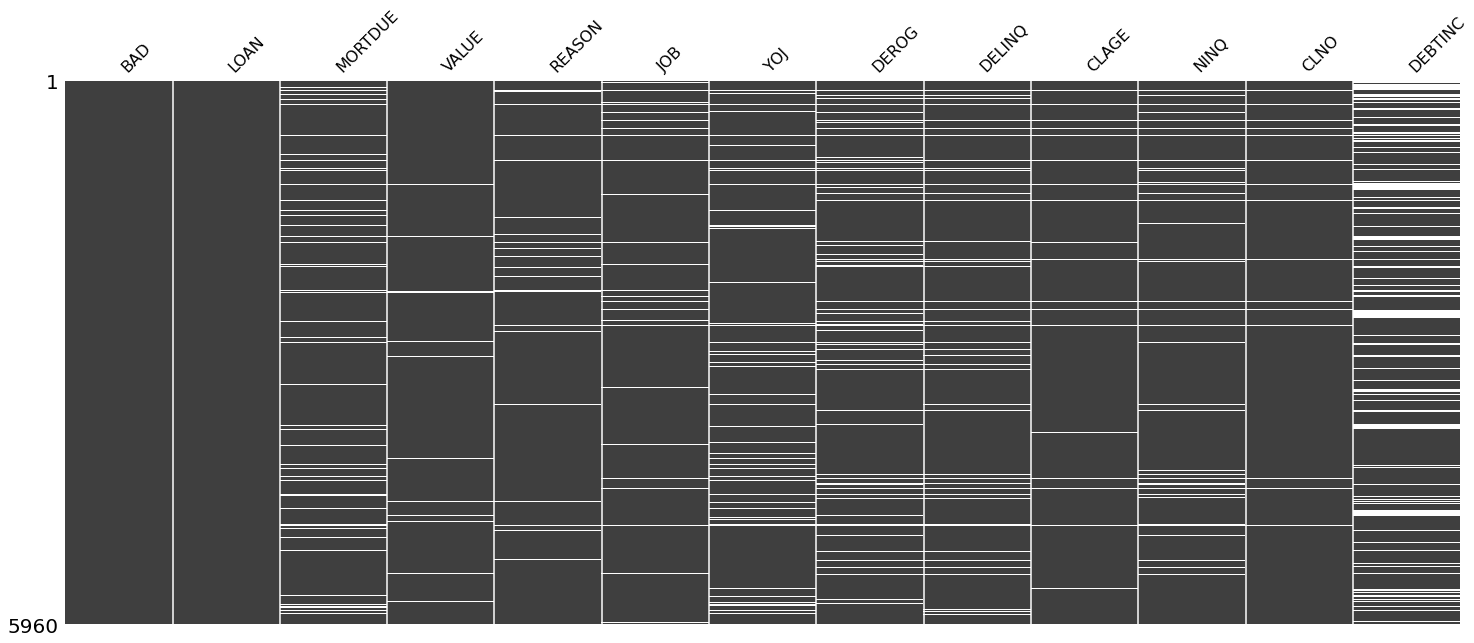

In [1372]:
msno.matrix(df,sparkline=False)

In [11]:
df.groupby('JOB')[['BAD']].mean().reset_index()

,JOB,BAD
0,Mgr,0.233377
1,Office,0.131857
2,Other,0.231993
3,ProfExe,0.166144
4,Sales,0.348624
5,Self,0.300518


In [12]:
df.groupby('REASON')[['BAD']].mean().reset_index()

,REASON,BAD
0,DebtCon,0.189664
1,HomeImp,0.222472


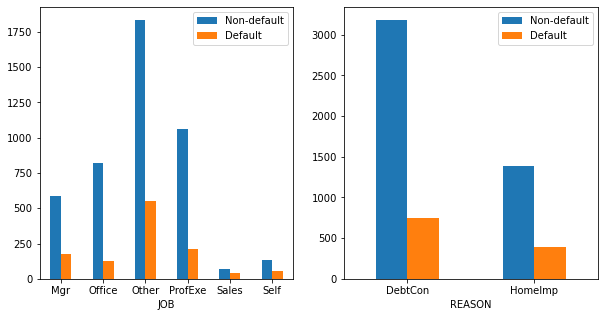

In [11]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
pd.crosstab(df.JOB, df.BAD).plot.bar(ax=ax[0],rot=0)
pd.crosstab(df.REASON, df.BAD).plot.bar(ax=ax[1],rot=0)
ax[0].legend(['Non-default','Default'])
ax[1].legend(['Non-default','Default'])
plt.show()

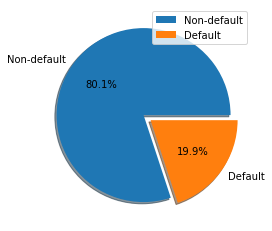

In [185]:
plt.pie(df.BAD.value_counts(),labels=['Non-default','Default'],shadow=True,explode=[0,0.1], autopct='%1.1f%%')
plt.legend()
plt.show()

In [678]:
df[df.isnull().sum(axis=1)>6].shape[0]
print(f'There are {df[df.isnull().sum(axis=1)>6].shape[0]} samples that contains more than 6 missing features ')

There are 126 samples that contains more than 6 missing features 


In [682]:
df

,BAD,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,0,1700,97800.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


### Drop samples

In [1249]:
df.drop(['VALUE'],axis=1,inplace=True)

In [1250]:
df.drop(df[df.isnull().sum(axis=1)>6].index,inplace=True)

### Train Test split

In [1284]:
y=df.BAD
X=df.drop(['BAD'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=9)

### Filling missing values

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = []

for col, ax in zip(cols, axes):
    data = df
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()


In [1285]:
def continuous_impute(original_dataframe):
    data=original_dataframe.copy()
    data['MORTDUE'].fillna(data['MORTDUE'].median(),inplace=True)
    #data['VALUE'].fillna(data['VALUE'].median(),inplace=True)
    data['YOJ'].fillna(data['YOJ'].median(),inplace=True)
    data['DEROG'].fillna(data['DEROG'].median(),inplace=True)
    data['DELINQ'].fillna(data['DELINQ'].median(),inplace=True)
    data['CLAGE'].fillna(data['CLAGE'].median(),inplace=True)
    data['NINQ'].fillna(data['NINQ'].median(),inplace=True)
    data['CLNO'].fillna(data['CLNO'].median(),inplace=True)
    data['DEBTINC'].fillna(data['DEBTINC'].median(),inplace=True)
    return data

In [1286]:
X_train_fill=continuous_impute(X_train)
X_test_fill=continuous_impute(X_test)

In [1287]:
def knn_classifier(original_dataframe):
    dataframe1=original_dataframe.copy()
    dataframe1.drop(['REASON'],axis=1,inplace=True)
    train1=dataframe1[~dataframe1['JOB'].isnull()]
    X_train1=train1.drop(['JOB'],axis=1)
    y_train1=train1.JOB
    X_test1=dataframe1[dataframe1['JOB'].isnull()].drop(['JOB'],axis=1)
    scaler1 = MinMaxScaler()
    X_train_normalize1=scaler1.fit_transform(X_train1)
    X_test_normalize1=scaler1.transform(X_test1)
    knn1 = KNeighborsClassifier(n_neighbors=13).fit(X_train_normalize1, y_train1)
    y_pred1=knn1.predict(X_test_normalize1)
    
    dataframe2=original_dataframe.copy()
    dataframe2.drop(['JOB'],axis=1,inplace=True)
    train2=dataframe2[~dataframe2['REASON'].isnull()]
    X_train2=train2.drop(['REASON'],axis=1)
    y_train2=train2.REASON
    X_test2=dataframe2[dataframe2['REASON'].isnull()].drop(['REASON'],axis=1)
    scaler2 = MinMaxScaler()
    X_train_normalize2=scaler2.fit_transform(X_train2)
    X_test_normalize2=scaler2.transform(X_test2)
    knn2 = KNeighborsClassifier(n_neighbors=5).fit(X_train_normalize2, y_train2)
    y_pred2=knn2.predict(X_test_normalize2)
    
    dataframe=original_dataframe.copy()
    dataframe['JOB'] = dataframe['JOB'].fillna(pd.Series(y_pred1,index=X_test1.index))
    dataframe['REASON'] = dataframe['REASON'].fillna(pd.Series(y_pred2,index=X_test2.index))
    
    return dataframe
    

In [1288]:
X_train_knn=knn_classifier(X_train_fill)
X_test_knn=knn_classifier(X_test_fill)

### Encoding

In [1289]:
X_train_encode=pd.get_dummies(X_train_knn, drop_first=False)
X_test_encode=pd.get_dummies(X_test_knn, drop_first=False)

### Scale

In [1290]:
scaler1=MinMaxScaler()
X_train_scale=scaler1.fit_transform(X_train_encode)
X_test_scale=scaler1.transform(X_test_encode)

### Resampling

In [910]:
rf = LogisticRegression()
baseline_model = rf.fit(X_train_scale, y_train)
baseline_prediction = baseline_model.predict(X_test_scale)
print(classification_report(y_test, baseline_prediction,digits=4))

              precision    recall  f1-score   support

           0     0.8347    0.9715    0.8979      1403
           1     0.6639    0.2264    0.3376       349

    accuracy                         0.8231      1752
   macro avg     0.7493    0.5989    0.6177      1752
weighted avg     0.8006    0.8231    0.7863      1752



In [911]:
rus = RandomUnderSampler(random_state=42)
X_train_scale_rus, y_train_scale_rus= rus.fit_resample(X_train_scale, y_train)
rus_model = rf.fit(X_train_scale_rus, y_train_scale_rus)
rus_prediction = rus_model.predict(X_test_scale)
print(classification_report(y_test, rus_prediction,digits=4))

              precision    recall  f1-score   support

           0     0.8904    0.7762    0.8294      1403
           1     0.4064    0.6160    0.4897       349

    accuracy                         0.7443      1752
   macro avg     0.6484    0.6961    0.6596      1752
weighted avg     0.7940    0.7443    0.7617      1752



In [1291]:
X_train_rus, y_train_rus= rus.fit_resample(X_train_scale, y_train)

## Logistic Regression

In [814]:
pipe=Pipeline([('norm',MinMaxScaler()),('rus',RandomUnderSampler(random_state=42)),('log',LogisticRegression())])
params={'log__penalty':['l1', 'l2', 'elasticnet', 'none'],
        'log__C':[10,1,0.1,0.01],
        'log__solver':['newton-cg', 'lbfgs', 'liblinear']
       }
kfold=StratifiedKFold(n_splits=5,shuffle=True)
f1=make_scorer(f1_score, pos_label=1)
clf1=GridSearchCV(pipe, param_grid = params, cv = kfold, scoring=f1)
clf1.fit(X_train_encode,y_train)
print(clf1.best_params_)
print(clf1.best_score_)

{'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
0.5477184783209232


In [913]:
start = time()
log=LogisticRegression(C=1,penalty='l1',solver='liblinear').fit(X_train_rus,y_train_rus)
#y_pred_train1=log.predict(X_train_scale)
#print(classification_report(y_train_rus,y_pred_train1))
#cm1 = confusion_matrix(y_train_rus, y_pred_train1)
#sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues',cbar=False)
#prob_y_train1=log.predict_proba(X_train_scale)
#prob_y_train1=[p[1] for p in prob_y_train1]
#print('AUC: %.2f%%' % (roc_auc_score(y_train_rus,prob_y_train1)*100.0))
#print('Accuracy: %.2f%%' % (accuracy_score(y_train_rus,y_pred_train1)*100.0))
print(f'Time taken to run: {time()-start} seconds')

Time taken to run: 0.01894831657409668 seconds


              precision    recall  f1-score   support

           0     0.8879    0.7847    0.8331      1403
           1     0.4102    0.6017    0.4878       349

    accuracy                         0.7483      1752
   macro avg     0.6490    0.6932    0.6605      1752
weighted avg     0.7927    0.7483    0.7644      1752

AUC: 77.15%
Accuracy: 74.83%
G-mean: 68.72%


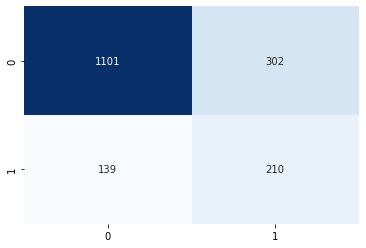

In [914]:
y_pred_test1=log.predict(X_test_scale)
print(classification_report(y_test,y_pred_test1,digits=4))
cm2 = confusion_matrix(y_test, y_pred_test1)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test1=log.predict_proba(X_test_scale)
prob_y_test1=[p[1] for p in prob_y_test1]
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test1)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test1)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test1)*100.0))

In [843]:
print(precision_score(y_test,y_pred_test1))
print(recall_score(y_test,y_pred_test1))
print(f1_score(y_test,y_pred_test1))

0.41015625
0.6017191977077364
0.4878048780487804


#### Using WOE

In [959]:
def woe_trans(train,test):
    columns=train.columns
    columns_cat=['REASON','JOB']
    train_woe=pd.DataFrame()
    test_woe=pd.DataFrame()
    for column in columns:
        x=train[column]
        if column in columns_cat:
            optb = OptimalBinning(dtype='categorical').fit(x,y_train)
        else:
            optb = OptimalBinning(monotonic_trend='ascending').fit(x,y_train)
        table=optb.binning_table.build()
        c_train=pd.DataFrame(optb.transform(x, metric='woe'),index=train.index,columns=[column])
        c_test=pd.DataFrame(optb.transform(test[column], metric='woe'),index=test.index,columns=[column])
        train_woe=pd.concat([train_woe, c_train], axis=1)
        test_woe=pd.concat([test_woe, c_test], axis=1)
        train_woe.replace(0,table['WoE'][table.index[-2]],inplace=True)
        test_woe.replace(0,table['WoE'][table.index[-2]],inplace=True)
    return train_woe,test_woe

In [960]:
X_train_woe,X_test_woe=woe_trans(X_train,X_test)
X_train_woe_rus, y_train_woe_rus= rus.fit_resample(X_train_woe, y_train)
X_train_woe_rus=X_train_woe_rus.to_numpy()
y_train_woe_rus=y_train_woe_rus.to_numpy()
X_test_woe=X_test_woe.to_numpy()

In [822]:
params={'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C':[10,1,0.1,0.01],
        'solver':['newton-cg', 'lbfgs', 'liblinear']
       }
kfold=StratifiedKFold(n_splits=5,shuffle=True)
f1=make_scorer(f1_score, pos_label=1)
clf1=GridSearchCV(LogisticRegression(), param_grid = params, cv = kfold, scoring=f1)
clf1.fit(X_train_woe_rus,y_train_woe_rus)
print(clf1.best_params_)
print(clf1.best_score_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.8248311462952124


In [961]:
start = time()
log=LogisticRegression(C=0.1,penalty='l1',solver='liblinear').fit(X_train_woe_rus,y_train_woe_rus)
#y_pred_train1=log.predict(X_train_woe)
#print(classification_report(y_train_rus_woe,y_pred_train1))
#cm1 = confusion_matrix(y_train_rus_woe, y_pred_train1)
#sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues',cbar=False)
#prob_y_train1=log.predict_proba(X_train_woe)
#prob_y_train1=[p[1] for p in prob_y_train1]
#print('AUC: %.2f%%' % (roc_auc_score(y_train_rus_woe,prob_y_train1)*100.0))
#print('Accuracy: %.2f%%' % (accuracy_score(y_train_rus_woe,y_pred_train1)*100.0))
print(f'Time taken to run: {time()-start} seconds')

Time taken to run: 0.004021883010864258 seconds


              precision    recall  f1-score   support

           0     0.9389    0.8432    0.8885      1403
           1     0.5528    0.7794    0.6468       349

    accuracy                         0.8305      1752
   macro avg     0.7459    0.8113    0.7677      1752
weighted avg     0.8620    0.8305    0.8403      1752

AUC: 86.54%
Accuracy: 83.05%
G-mean: 81.07%


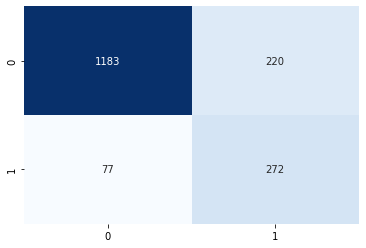

In [962]:
y_pred_test1_woe=log.predict(X_test_woe)
print(classification_report(y_test,y_pred_test1_woe,digits=4))
cm2 = confusion_matrix(y_test, y_pred_test1_woe)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test1_woe=log.predict_proba(X_test_woe)
prob_y_test1_woe=[p[1] for p in prob_y_test1_woe]
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test1_woe)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test1_woe)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test1_woe)*100.0))

## Gradient Boosting

### XGBoost

In [1459]:
pipe=Pipeline([('norm',MinMaxScaler()),('rus',RandomUnderSampler(random_state=42)),('xgb',XGBClassifier())])
params = {
        'xgb__min_child_weight': [x for x in np.linspace(start = 0, stop = 10, num = 11)],
        'xgb__gamma': [x for x in np.linspace(start = 0, stop = 2, num = 20)],
        'xgb__subsample': [x for x in np.linspace(start = 0.3, stop = 1, num = 11)],
        'xgb__eta': [x for x in np.linspace(start = 0.2, stop = 1, num = 5)],
        'xgb__max_depth': [int(x) for x in np.linspace(start = 3, stop = 8, num = 6)]
        }
kfold=StratifiedKFold(n_splits=5,shuffle=True)
f1=make_scorer(f1_score, pos_label=1)
clf2=RandomizedSearchCV(pipe, param_distributions = params, cv = kfold, scoring=f1,n_iter = 100)
clf2.fit(X_train_encode,y_train)
print(clf2.best_params_)
print(clf2.best_score_)

KeyboardInterrupt: 

In [1292]:
start = time()
xgb2=XGBClassifier(subsample=0.65,min_child_weight=0,max_depth=6,gamma=0,eta=0.4).fit(X_train_rus,y_train_rus)
#y_pred_train2=xgb2.predict(X_train_rus)
#print(classification_report(y_train_rus,y_pred_train2))
#cm5 = confusion_matrix(y_train_rus, y_pred_train2)
#sns.heatmap(cm5,annot=True,fmt='d',cmap='Blues',cbar=False)
#prob_y_train2=xgb2.predict_proba(X_train_rus)
#prob_y_train2=[p[1] for p in prob_y_train2]
#print('AUC: %.2f%%' % (roc_auc_score(y_train_rus,prob_y_train2)*100.0))
#print('Accuracy: %.2f%%' % (accuracy_score(y_train_rus,y_pred_train2)*100.0))
print(f'Time taken to run: {time()-start} seconds')

Time taken to run: 0.25232505798339844 seconds


              precision    recall  f1-score   support

           0     0.9302    0.9309    0.9305      1403
           1     0.7213    0.7192    0.7202       349

    accuracy                         0.8887      1752
   macro avg     0.8257    0.8250    0.8254      1752
weighted avg     0.8886    0.8887    0.8886      1752

AUC: 91.68%
Accuracy: 88.87%
G-mean: 81.82%


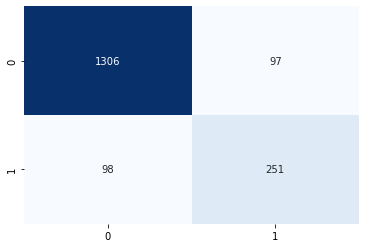

In [1293]:
y_pred_test2=xgb2.predict(X_test_scale)
print(classification_report(y_test,y_pred_test2,digits=4))
cm6 = confusion_matrix(y_test, y_pred_test2)
sns.heatmap(cm6,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test2=xgb2.predict_proba(X_test_scale)
prob_y_test2=[p[1] for p in prob_y_test2]
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test2)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test2)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test2)*100.0))

### LightGBM

In [412]:
pipe=Pipeline([('norm',MinMaxScaler()),('rus',RandomUnderSampler(random_state=42)),('lgbm',LGBMClassifier())])
params = {
        'lgbm__learning_rate': [x for x in np.linspace(start = 0.05, stop = 0.3, num = 6)],
        'lgbm__n_estimators': [int(x) for x in np.linspace(start = 300, stop = 1000, num = 9)],
        'lgbm__min_child_samples': [int(x) for x in np.linspace(start = 30, stop = 200, num = 11)],
        'lgbm__max_depth': [int(x) for x in np.linspace(start = 4, stop = 7, num = 4)],
        'lgbm__num_leaves': [int(x) for x in np.linspace(start = 15, stop = 70, num = 13)],
        'lgbm__subsample': [x for x in np.linspace(start = 0.8, stop = 1, num = 3)],
        'lgbm__colsample_bytree': [x for x in np.linspace(start = 0.8, stop = 1, num = 3)],
        'lgbm__reg_alpha': [0, 0.01,0.1, 1, 2],
        'lgbm__reg_lambda': [0, 0.01, 0.1, 1, 2]
}
kfold=StratifiedKFold(n_splits=5,shuffle=True)
f1=make_scorer(f1_score, pos_label=1)
clf2=RandomizedSearchCV(pipe, param_distributions = params, cv = kfold, scoring=f1,n_iter = 200)
clf2.fit(X_train_encode,y_train)
print(clf2.best_params_)
print(clf2.best_score_)

{'lgbm__subsample': 0.8, 'lgbm__reg_lambda': 0, 'lgbm__reg_alpha': 0.01, 'lgbm__num_leaves': 15, 'lgbm__n_estimators': 475, 'lgbm__min_child_samples': 47, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.3, 'lgbm__colsample_bytree': 0.8}
0.7118617638687624


In [1294]:
start = time()
lgbm2=LGBMClassifier(subsample=0.8,reg_lambda=0,reg_alpha=0.01,num_leaves=15,n_estimators=475,min_child_samples=47,max_depth=7,learning_rate=0.3,colsample_bytree=0.8).fit(X_train_rus,y_train_rus)
#y_pred_train3=lgbm2.predict(X_train_rus)
#print(classification_report(y_train_rus,y_pred_train3))
#cm9 = confusion_matrix(y_train_rus, y_pred_train3)
#sns.heatmap(cm9,annot=True,fmt='d',cmap='Blues',cbar=False)
#prob_y_train3=lgbm2.predict_proba(X_train_rus)
#prob_y_train3=[p[1] for p in prob_y_train3]
#print('AUC: %.2f%%' % (roc_auc_score(y_train_rus,prob_y_train3)*100.0))
#print('Accuracy: %.2f%%' % (accuracy_score(y_train_rus,y_pred_train3)*100.0))
print(f'Time taken to run: {time()-start} seconds')

Time taken to run: 0.292217493057251 seconds


              precision    recall  f1-score   support

           0     0.9086    0.9351    0.9217      1403
           1     0.7045    0.6218    0.6606       349

    accuracy                         0.8727      1752
   macro avg     0.8066    0.7785    0.7911      1752
weighted avg     0.8679    0.8727    0.8697      1752

AUC: 89.62%
Accuracy: 87.27%
G-mean: 76.25%


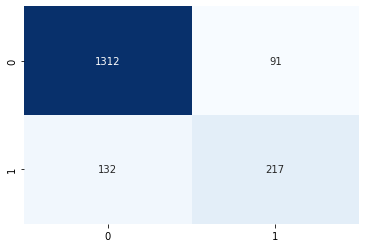

In [1295]:
y_pred_test3=lgbm2.predict(X_test_scale)
print(classification_report(y_test,y_pred_test3,digits=4))
cm10 = confusion_matrix(y_test, y_pred_test3)
sns.heatmap(cm10,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test3=lgbm2.predict_proba(X_test_scale)
prob_y_test3=[p[1] for p in prob_y_test3]
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test3)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test3)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test3)*100.0))

## Neural Networks

create inner train and validation set

In [1442]:
X_inner_train_encode, X_val_encode, y_inner_train, y_val = train_test_split(X_train_encode, y_train, stratify=y_train, test_size=0.3,random_state=19)
scaler2=MinMaxScaler()
X_inner_train_scale=scaler2.fit_transform(X_inner_train_encode)
X_val_scale=scaler2.transform(X_val_encode)
X_inner_train_rus, y_inner_train_rus= rus.fit_resample(X_inner_train_scale, y_inner_train)

### MLP

In [1444]:
MLP = Sequential()
MLP.add(Dense(17, input_dim=X_inner_train_rus.shape[1],activation='relu'))
MLP.add(Dense(17, activation='relu'))
MLP.add(Dense(1, activation='sigmoid'))
opt=Adam(lr=0.001)
MLP.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])
MLP_fit=MLP.fit(X_inner_train_rus, y_inner_train_rus, epochs=300,batch_size=30,validation_data = (X_val_scale,y_val))

Epoch 1/300
38/38 [==============================] - 2s 19ms/step - loss: 0.6962 - auc: 0.5432 - val_loss: 0.6479 - val_auc: 0.5884
Epoch 2/300
38/38 [==============================] - 0s 4ms/step - loss: 0.6809 - auc: 0.6204 - val_loss: 0.6731 - val_auc: 0.6204
Epoch 3/300
38/38 [==============================] - 0s 4ms/step - loss: 0.6718 - auc: 0.6567 - val_loss: 0.6707 - val_auc: 0.6461
Epoch 4/300
38/38 [==============================] - 0s 4ms/step - loss: 0.6626 - auc: 0.6719 - val_loss: 0.6553 - val_auc: 0.6671
Epoch 5/300
38/38 [==============================] - 0s 4ms/step - loss: 0.6501 - auc: 0.7018 - val_loss: 0.6598 - val_auc: 0.6964
Epoch 6/300
38/38 [==============================] - 0s 4ms/step - loss: 0.6335 - auc: 0.7305 - val_loss: 0.6354 - val_auc: 0.7284
Epoch 7/300
38/38 [==============================] - 0s 3ms/step - loss: 0.6173 - auc: 0.7450 - val_loss: 0.5883 - val_auc: 0.7488
Epoch 8/300
38/38 [==============================] - 0s 4ms/step - loss: 0.6006 - 

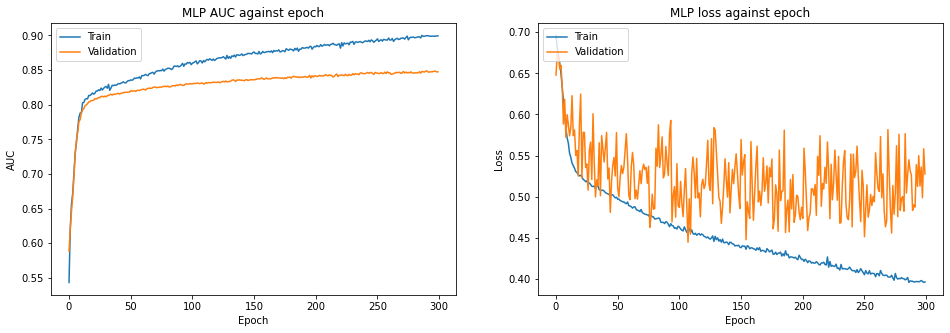

In [1445]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
ax1.plot(MLP_fit.history['auc'])
ax1.plot(MLP_fit.history['val_auc'])
ax1.set_title('MLP AUC against epoch')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax2.plot(MLP_fit.history['loss'])
ax2.plot(MLP_fit.history['val_loss'])
ax2.set_title('MLP loss against epoch')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1446]:
MLP_new = Sequential()
MLP_new.add(Dense(17, input_dim=X_inner_train_rus.shape[1]))
MLP_new.add(BatchNormalization())
MLP_new.add(Activation('relu'))
MLP_new.add(Dropout(0.4))
MLP_new.add(Dense(17))
MLP_new.add(BatchNormalization())
MLP_new.add(Activation('relu'))
MLP_new.add(Dropout(0.4))
MLP_new.add(Dense(1, activation='sigmoid'))
opt=Adam(lr=0.001)
MLP_new.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])
MLP_new_fit=MLP_new.fit(X_inner_train_rus, y_inner_train_rus, epochs=300,batch_size=30,validation_data = (X_val_scale,y_val))

Epoch 1/300
38/38 [==============================] - 3s 22ms/step - loss: 0.8670 - auc: 0.4683 - val_loss: 0.6966 - val_auc: 0.4320
Epoch 2/300
38/38 [==============================] - 0s 4ms/step - loss: 0.8276 - auc: 0.4753 - val_loss: 0.7078 - val_auc: 0.4849
Epoch 3/300
38/38 [==============================] - 0s 3ms/step - loss: 0.7479 - auc: 0.5336 - val_loss: 0.7154 - val_auc: 0.5257
Epoch 4/300
38/38 [==============================] - 0s 4ms/step - loss: 0.7511 - auc: 0.5174 - val_loss: 0.7155 - val_auc: 0.5599
Epoch 5/300
38/38 [==============================] - 0s 3ms/step - loss: 0.7429 - auc: 0.5326 - val_loss: 0.7156 - val_auc: 0.5802
Epoch 6/300
38/38 [==============================] - 0s 4ms/step - loss: 0.7279 - auc: 0.5423 - val_loss: 0.7169 - val_auc: 0.6014
Epoch 7/300
38/38 [==============================] - 0s 4ms/step - loss: 0.7044 - auc: 0.5639 - val_loss: 0.7137 - val_auc: 0.6150
Epoch 8/300
38/38 [==============================] - 0s 3ms/step - loss: 0.7110 - 

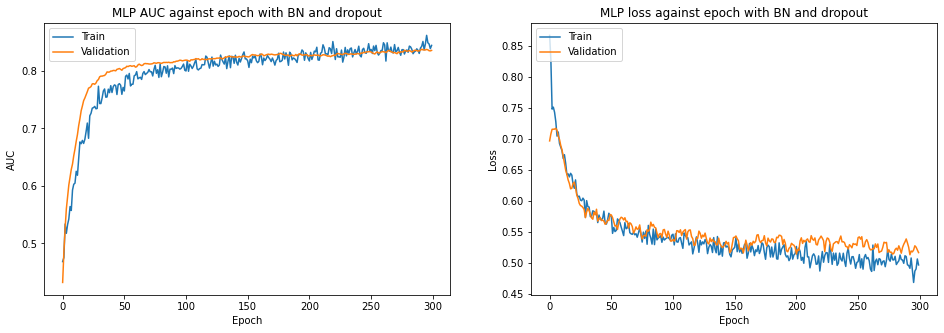

In [1447]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
ax1.plot(MLP_new_fit.history['auc'])
ax1.plot(MLP_new_fit.history['val_auc'])
ax1.set_title('MLP AUC against epoch with BN and dropout')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax2.plot(MLP_new_fit.history['loss'])
ax2.plot(MLP_new_fit.history['val_loss'])
ax2.set_title('MLP loss against epoch with BN and dropout')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1155]:
def MLP_function(x,y):
    network = Sequential()
    network.add(Dense(17, input_dim=x.shape[1]))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    network.add(Dropout(0.4))
    network.add(Dense(17))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    network.add(Dropout(0.4))
    network.add(Dense(1, activation='sigmoid'))
    opt=Adam(lr=0.001)
    network.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC'])
    network.fit(x, y, epochs=300,batch_size=30)
    return network

In [1448]:
MLP_opt=MLP_function(X_train_rus,y_train_rus)

Epoch 1/300
55/55 [==============================] - 2s 3ms/step - loss: 0.8391 - auc: 0.5185
Epoch 2/300
55/55 [==============================] - 0s 2ms/step - loss: 0.8017 - auc: 0.5171
Epoch 3/300
55/55 [==============================] - 0s 2ms/step - loss: 0.7686 - auc: 0.5312
Epoch 4/300
55/55 [==============================] - 0s 2ms/step - loss: 0.7317 - auc: 0.5571
Epoch 5/300
55/55 [==============================] - 0s 2ms/step - loss: 0.7079 - auc: 0.5721
Epoch 6/300
55/55 [==============================] - 0s 2ms/step - loss: 0.6942 - auc: 0.5881
Epoch 7/300
55/55 [==============================] - 0s 2ms/step - loss: 0.6932 - auc: 0.5922
Epoch 8/300
55/55 [==============================] - 0s 2ms/step - loss: 0.6722 - auc: 0.6227
Epoch 9/300
55/55 [==============================] - 0s 2ms/step - loss: 0.6688 - auc: 0.6296
Epoch 10/300
55/55 [==============================] - 0s 2ms/step - loss: 0.6584 - auc: 0.6394
Epoch 11/300
55/55 [==============================] - 0s 2m

55/55 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9198    0.7769    0.8423      1403
           1     0.4480    0.7278    0.5546       349

    accuracy                         0.7671      1752
   macro avg     0.6839    0.7524    0.6985      1752
weighted avg     0.8258    0.7671    0.7850      1752

55/55 [==============================] - 0s 981us/step
AUC: 83.12%
Accuracy: 76.71%
G-mean: 75.19%


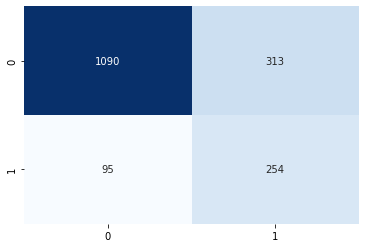

In [1449]:
y_pred_test5=(MLP_opt.predict(X_test_scale) > 0.5).astype('int32')
print(classification_report(y_test,y_pred_test5,digits=4))
cm14 = confusion_matrix(y_test, y_pred_test5)
sns.heatmap(cm14,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test5=MLP_opt.predict(X_test_scale)
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test5)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test5)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test5)*100.0))

In [1450]:
MLP_opt.summary()

Model: "sequential_207"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_642 (Dense)           (None, 17)                306       
                                                                 
 batch_normalization_324 (Ba  (None, 17)               68        
 tchNormalization)                                               
                                                                 
 activation_324 (Activation)  (None, 17)               0         
                                                                 
 dropout_287 (Dropout)       (None, 17)                0         
                                                                 
 dense_643 (Dense)           (None, 17)                306       
                                                                 
 batch_normalization_325 (Ba  (None, 17)               68        
 tchNormalization)                                  

### CNN

In [1451]:
start=time()
CNN=Sequential()
CNN.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same',input_shape=(X_inner_train_rus.shape[1],1)))
CNN.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'))
CNN.add(MaxPooling1D(pool_size = 2))
CNN.add(Flatten())
CNN.add(Dense(256,activation='relu'))
CNN.add(Dense(128,activation='relu'))
CNN.add(Dense(1,activation='sigmoid'))
opt=Adam(lr=0.0005)
CNN.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['AUC'])
CNN_fit=CNN.fit(X_inner_train_rus, y_inner_train_rus, epochs = 180, batch_size = 30, validation_data = (X_val_scale, y_val))
print(f'Time taken to run: {time()-start} seconds')

Epoch 1/180
38/38 [==============================] - 3s 33ms/step - loss: 0.6835 - auc: 0.6083 - val_loss: 0.6854 - val_auc: 0.7324
Epoch 2/180
38/38 [==============================] - 1s 14ms/step - loss: 0.6278 - auc: 0.7157 - val_loss: 0.5766 - val_auc: 0.7907
Epoch 3/180
38/38 [==============================] - 0s 13ms/step - loss: 0.5600 - auc: 0.7847 - val_loss: 0.5297 - val_auc: 0.8055
Epoch 4/180
38/38 [==============================] - 0s 12ms/step - loss: 0.5493 - auc: 0.7937 - val_loss: 0.5457 - val_auc: 0.8103
Epoch 5/180
38/38 [==============================] - 1s 14ms/step - loss: 0.5365 - auc: 0.8063 - val_loss: 0.5078 - val_auc: 0.8098
Epoch 6/180
38/38 [==============================] - 0s 13ms/step - loss: 0.5372 - auc: 0.8057 - val_loss: 0.5269 - val_auc: 0.8139
Epoch 7/180
38/38 [==============================] - 1s 14ms/step - loss: 0.5319 - auc: 0.8089 - val_loss: 0.4754 - val_auc: 0.8143
Epoch 8/180
38/38 [==============================] - 1s 19ms/step - loss: 0.

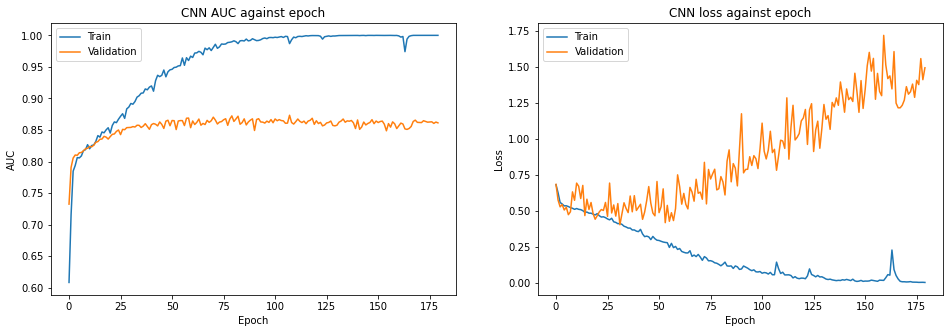

In [1452]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
ax1.plot(CNN_fit.history['auc'])
ax1.plot(CNN_fit.history['val_auc'])
ax1.set_title('CNN AUC against epoch')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax2.plot(CNN_fit.history['loss'])
ax2.plot(CNN_fit.history['val_loss'])
ax2.set_title('CNN loss against epoch')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1453]:
start=time()
CNN_new=Sequential()
CNN_new.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same',input_shape=(X_inner_train_rus.shape[1],1)))
CNN_new.add(BatchNormalization())
CNN_new.add(Activation('relu'))
CNN_new.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
CNN_new.add(BatchNormalization())
CNN_new.add(Activation('relu'))
CNN_new.add(MaxPooling1D(pool_size = 2))
CNN_new.add(Dropout(0.5))
CNN_new.add(Flatten())
CNN_new.add(Dense(256))
CNN_new.add(BatchNormalization())
CNN_new.add(Activation('relu'))
CNN_new.add(Dropout(0.5))
CNN_new.add(Dense(128))
CNN_new.add(BatchNormalization())
CNN_new.add(Activation('relu'))
CNN_new.add(Dropout(0.5))
CNN_new.add(Dense(1,activation='sigmoid'))
opt=Adam(lr=0.0005)
CNN_new.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['AUC'])
CNN_fit_new=CNN_new.fit(X_inner_train_rus, y_inner_train_rus, epochs = 180, batch_size = 30, validation_data = (X_val_scale, y_val))
print(f'Time taken to run: {time()-start} seconds')

Epoch 1/180
38/38 [==============================] - 4s 27ms/step - loss: 0.8253 - auc: 0.5429 - val_loss: 0.7094 - val_auc: 0.5347
Epoch 2/180
38/38 [==============================] - 1s 15ms/step - loss: 0.7997 - auc: 0.5560 - val_loss: 0.7001 - val_auc: 0.6156
Epoch 3/180
38/38 [==============================] - 1s 15ms/step - loss: 0.7421 - auc: 0.6100 - val_loss: 0.7660 - val_auc: 0.7275
Epoch 4/180
38/38 [==============================] - 1s 15ms/step - loss: 0.7571 - auc: 0.6031 - val_loss: 0.7959 - val_auc: 0.7609
Epoch 5/180
38/38 [==============================] - 1s 15ms/step - loss: 0.6879 - auc: 0.6701 - val_loss: 0.8608 - val_auc: 0.7778
Epoch 6/180
38/38 [==============================] - 1s 17ms/step - loss: 0.6708 - auc: 0.6871 - val_loss: 0.9559 - val_auc: 0.7923
Epoch 7/180
38/38 [==============================] - 1s 14ms/step - loss: 0.6298 - auc: 0.7316 - val_loss: 0.9916 - val_auc: 0.7934
Epoch 8/180
38/38 [==============================] - 1s 15ms/step - loss: 0.

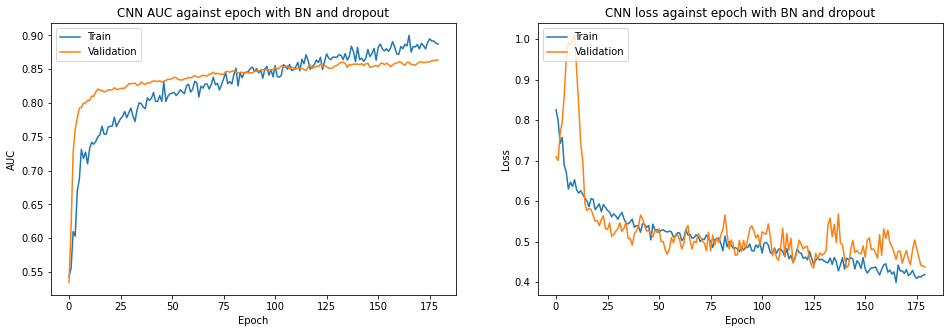

In [1454]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)
ax1.plot(CNN_fit_new.history['auc'])
ax1.plot(CNN_fit_new.history['val_auc'])
ax1.set_title('CNN AUC against epoch with BN and dropout')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax2.plot(CNN_fit_new.history['loss'])
ax2.plot(CNN_fit_new.history['val_loss'])
ax2.set_title('CNN loss against epoch with BN and dropout')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1455]:
def CNN_function(x,y):
    network=Sequential()
    network.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same',input_shape=(x.shape[1],1)))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    network.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    network.add(MaxPooling1D(pool_size = 2))
    network.add(Dropout(0.5))
    network.add(Flatten())
    network.add(Dense(256))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    network.add(Dropout(0.5))
    network.add(Dense(128))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    network.add(Dropout(0.5))
    network.add(Dense(1,activation='sigmoid'))
    opt=Adam(lr=0.0005)
    network.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['AUC'])
    network.fit(x, y, epochs=180,batch_size=30)
    return network

In [1456]:
CNN_opt=CNN_function(X_train_rus,y_train_rus)

Epoch 1/180
55/55 [==============================] - 32s 18ms/step - loss: 0.8549 - auc: 0.5277
Epoch 2/180
55/55 [==============================] - 1s 18ms/step - loss: 0.7872 - auc: 0.5691
Epoch 3/180
55/55 [==============================] - 1s 17ms/step - loss: 0.7188 - auc: 0.6360
Epoch 4/180
55/55 [==============================] - 1s 17ms/step - loss: 0.6871 - auc: 0.6690
Epoch 5/180
55/55 [==============================] - 1s 19ms/step - loss: 0.6791 - auc: 0.6816
Epoch 6/180
55/55 [==============================] - 1s 20ms/step - loss: 0.6410 - auc: 0.7198
Epoch 7/180
55/55 [==============================] - 1s 17ms/step - loss: 0.6334 - auc: 0.7311
Epoch 8/180
55/55 [==============================] - 1s 17ms/step - loss: 0.6381 - auc: 0.7255
Epoch 9/180
55/55 [==============================] - 1s 19ms/step - loss: 0.6201 - auc: 0.7402
Epoch 10/180
55/55 [==============================] - 1s 25ms/step - loss: 0.6226 - auc: 0.7373
Epoch 11/180
55/55 [============================

55/55 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0     0.9278    0.8339    0.8784      1403
           1     0.5255    0.7393    0.6143       349

    accuracy                         0.8151      1752
   macro avg     0.7266    0.7866    0.7463      1752
weighted avg     0.8477    0.8151    0.8258      1752

55/55 [==============================] - 0s 6ms/step
AUC: 86.70%
Accuracy: 81.51%
G-mean: 78.52%


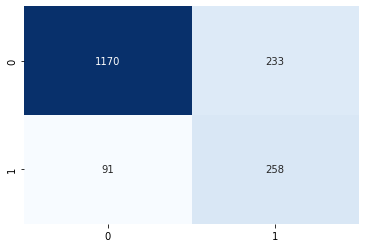

In [1457]:
y_pred_test6=(CNN_opt.predict(X_test_scale) > 0.5).astype('int32')
print(classification_report(y_test,y_pred_test6,digits=4))
cm16 = confusion_matrix(y_test, y_pred_test6)
sns.heatmap(cm16,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test6=CNN_opt.predict(X_test_scale)
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test6)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test6)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test6)*100.0))

In [1458]:
CNN_opt.summary()

Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_211 (Conv1D)         (None, 17, 64)            256       
                                                                 
 batch_normalization_330 (Ba  (None, 17, 64)           256       
 tchNormalization)                                               
                                                                 
 activation_330 (Activation)  (None, 17, 64)           0         
                                                                 
 conv1d_212 (Conv1D)         (None, 17, 64)            12352     
                                                                 
 batch_normalization_331 (Ba  (None, 17, 64)           256       
 tchNormalization)                                               
                                                                 
 activation_331 (Activation)  (None, 17, 64)        

## Hybrid

In [1184]:
CNN.layers

In [1185]:
from tensorflow.keras import backend as K

viz_func = K.function([CNN_opt.input], [CNN_opt.layers[8].output])
output = viz_func([X_train_rus])
new_train=output[0]

In [1186]:
start = time()
lgbm3=LGBMClassifier(subsample=0.8,reg_lambda=0,reg_alpha=0.01,num_leaves=15,n_estimators=475,min_child_samples=47,max_depth=7,learning_rate=0.3,colsample_bytree=0.8).fit(new_train,y_train_rus)
#y_pred_train_raw3=lgbm3.predict(new_train)
#print(classification_report(y_train_rus,y_pred_train_raw3))
#cm7 = confusion_matrix(y_train_rus, y_pred_train_raw3)
#sns.heatmap(cm7,annot=True,fmt='d',cmap='Blues',cbar=False)
#prob_y_train_raw3=lgbm3.predict_proba(new_train)
#prob_y_train_raw3=[p[1] for p in prob_y_train_raw3]
#print('AUC: %.2f%%' % (roc_auc_score(y_train_rus,prob_y_train_raw3)*100.0))
#print('Accuracy: %.2f%%' % (accuracy_score(y_train_rus,y_pred_train_raw3)*100.0))
print(f'Time taken to run: {time()-start} seconds')

Time taken to run: 1.3270809650421143 seconds


In [1187]:
viz_func = K.function([CNN_opt.input], [CNN_opt.layers[8].output])
output2 = viz_func([X_test_scale])[0]

              precision    recall  f1-score   support

           0     0.9342    0.9109    0.9224      1403
           1     0.6745    0.7421    0.7067       349

    accuracy                         0.8773      1752
   macro avg     0.8043    0.8265    0.8145      1752
weighted avg     0.8825    0.8773    0.8794      1752

AUC: 91.50%
Accuracy: 87.73%
G-mean: 82.22%


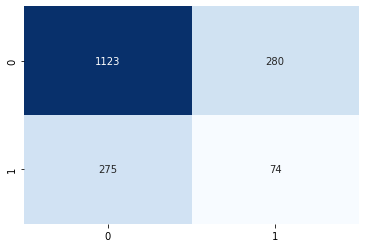

In [1188]:
y_pred_test7=lgbm3.predict(output2)
print(classification_report(y_test,y_pred_test7,digits=4))
cm10 = confusion_matrix(y_test, y_pred_test3)
sns.heatmap(cm10,annot=True,fmt='d',cmap='Blues',cbar=False)
prob_y_test7=lgbm3.predict_proba(output2)
prob_y_test7=[p[1] for p in prob_y_test7]
print('AUC: %.2f%%' % (roc_auc_score(y_test,prob_y_test7)*100.0))
print('Accuracy: %.2f%%' % (accuracy_score(y_test,y_pred_test7)*100.0))
print('G-mean: %.2f%%' % (geometric_mean_score(y_test,y_pred_test7)*100.0))

10 times train test split and compute average result

### ROC Curve

fpr1, tpr1, _ = roc_curve(y_train_rus,  prob_y_train1)
fpr2, tpr2, _ = roc_curve(y_train_rus,  prob_y_train_raw2)
fpr3, tpr3, _ = roc_curve(y_train_rus,  prob_y_train_raw3)
#fpr4, tpr4, _ = roc_curve(y_train_rus,  prob_y_train4)
fpr5, tpr5, _ = roc_curve(y_train_rus,  prob_y_train5)
fpr6, tpr6, _ = roc_curve(y_train_rus,  prob_y_train6)
#create ROC curve
plt.xlim(-0.01,1)
plt.ylim(0,1.01)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr1,tpr1,label='Logstic Regression (AUC = %0.2f)'% roc_auc_score(y_train_rus,prob_y_train1))
plt.plot(fpr2,tpr2,label='XGBoost (AUC = %0.2f)'% roc_auc_score(y_train_rus,prob_y_train_raw2))
plt.plot(fpr3,tpr3,label='LightGBM (AUC = %0.2f)'% roc_auc_score(y_train_rus,prob_y_train_raw3))
#plt.plot(fpr4,tpr4,label='CatBoost (AUC = %0.2f)'% roc_auc_score(y_train_rus,prob_y_train4))
plt.plot(fpr5,tpr5,label='MLP (AUC = %0.2f)'% roc_auc_score(y_train_rus,prob_y_train5))
plt.plot(fpr6,tpr6,label='CNN (AUC = %0.2f)'% roc_auc_score(y_train_rus,prob_y_train6))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve on training set')
plt.legend(loc=4)
plt.show()

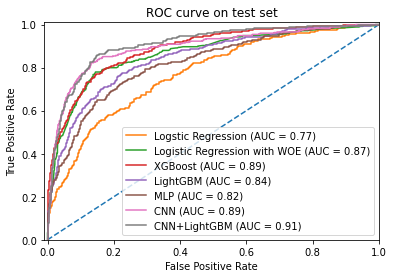

In [839]:
fpr1, tpr1, _ = roc_curve(y_test,  prob_y_test1)
fpr2, tpr2, _ = roc_curve(y_test,  prob_y_test1_woe)
fpr3, tpr3, _ = roc_curve(y_test,  prob_y_test2)
fpr4, tpr4, _ = roc_curve(y_test,  prob_y_test3)
fpr5, tpr5, _ = roc_curve(y_test,  prob_y_test5)
fpr6, tpr6, _ = roc_curve(y_test,  prob_y_test6)
fpr7, tpr7, _ = roc_curve(y_test,  prob_y_test7)
#create ROC curve
plt.xlim(-0.01,1)
plt.ylim(0,1.01)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr1,tpr1,label='Logstic Regression (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test1))
plt.plot(fpr2,tpr2,label='Logistic Regression with WOE (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test1_woe))
plt.plot(fpr3,tpr3,label='XGBoost (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test2))
plt.plot(fpr4,tpr4,label='LightGBM (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test3))
plt.plot(fpr5,tpr5,label='MLP (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test5))
plt.plot(fpr6,tpr6,label='CNN (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test6))
plt.plot(fpr7,tpr7,label='CNN+LightGBM (AUC = %0.2f)'% roc_auc_score(y_test,prob_y_test7))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve on test set')
plt.legend(loc=4)
plt.show()

### Ten time train test split evaluation

In [1241]:
log_lists = dict()
log_woe_lists=dict()
xgb_lists=dict()
lgbm_lists=dict()
mlp_lists=dict()
cnn_lists=dict()
cnn_log_lists=dict()
cnn_log_woe_lists=dict()
cnn_xgb_lists=dict()
cnn_lgbm_lists=dict()
for i in ['auc', 'acc','g','re','pre','f']:
    log_lists[i] = []
    log_woe_lists[i] = []
    xgb_lists[i] = []
    lgbm_lists[i] = []
    mlp_lists[i] = []
    cnn_lists[i] = []
    cnn_log_lists[i] = []
    cnn_log_woe_lists[i] = []
    cnn_xgb_lists[i] = []
    cnn_lgbm_lists[i] = []

In [1242]:
for i in random.sample(list(np.arange(1,200)),10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=i)
    X_train_fill=continuous_impute(X_train)
    X_test_fill=continuous_impute(X_test)
    X_train_knn=knn_classifier(X_train_fill)
    X_test_knn=knn_classifier(X_test_fill)
    X_train_encode=pd.get_dummies(X_train_knn, drop_first=False)
    X_test_encode=pd.get_dummies(X_test_knn, drop_first=False)
    X_train_scale=scaler1.fit_transform(X_train_encode)
    X_test_scale=scaler1.transform(X_test_encode)
    X_train_rus, y_train_rus= rus.fit_resample(X_train_scale, y_train)
    X_train_woe,X_test_woe=woe_trans(X_train,X_test)
    X_train_woe_rus, y_train_woe_rus= rus.fit_resample(X_train_woe, y_train)
    X_train_woe_rus=X_train_woe_rus.to_numpy()
    y_train_woe_rus=y_train_woe_rus.to_numpy()
    X_test_woe=X_test_woe.to_numpy()
    
    log=LogisticRegression(C=1,penalty='l1',solver='liblinear').fit(X_train_rus,y_train_rus)
    y_pred_test1=log.predict(X_test_scale)
    prob_y_test1=log.predict_proba(X_test_scale)
    prob_y_test1=[p[1] for p in prob_y_test1]
    log_lists['auc'].append(roc_auc_score(y_test,prob_y_test1))
    log_lists['acc'].append(accuracy_score(y_test,y_pred_test1))
    log_lists['g'].append(geometric_mean_score(y_test,y_pred_test1))
    log_lists['re'].append(recall_score(y_test,y_pred_test1))
    log_lists['pre'].append(precision_score(y_test,y_pred_test1))
    log_lists['f'].append(f1_score(y_test,y_pred_test1))
    
    log_woe=LogisticRegression(C=0.1,penalty='l1',solver='liblinear').fit(X_train_woe_rus,y_train_woe_rus)
    y_pred_test2=log_woe.predict(X_test_woe)
    prob_y_test2=log_woe.predict_proba(X_test_woe)
    prob_y_test2=[p[1] for p in prob_y_test2]
    log_woe_lists['auc'].append(roc_auc_score(y_test,prob_y_test2))
    log_woe_lists['acc'].append(accuracy_score(y_test,y_pred_test2))
    log_woe_lists['g'].append(geometric_mean_score(y_test,y_pred_test2))
    log_woe_lists['re'].append(recall_score(y_test,y_pred_test2))
    log_woe_lists['pre'].append(precision_score(y_test,y_pred_test2))
    log_woe_lists['f'].append(f1_score(y_test,y_pred_test2))
    
    xgb=XGBClassifier(subsample=0.65,min_child_weight=0,max_depth=6,gamma=0,eta=0.4).fit(X_train_rus,y_train_rus)
    y_pred_test3=xgb.predict(X_test_scale)
    prob_y_test3=xgb.predict_proba(X_test_scale)
    prob_y_test3=[p[1] for p in prob_y_test3]
    xgb_lists['auc'].append(roc_auc_score(y_test,prob_y_test3))
    xgb_lists['acc'].append(accuracy_score(y_test,y_pred_test3))
    xgb_lists['g'].append(geometric_mean_score(y_test,y_pred_test3))
    xgb_lists['re'].append(recall_score(y_test,y_pred_test3))
    xgb_lists['pre'].append(precision_score(y_test,y_pred_test3))
    xgb_lists['f'].append(f1_score(y_test,y_pred_test3))
    
    lgbm=LGBMClassifier(subsample=0.8,reg_lambda=0,reg_alpha=0.01,num_leaves=15,n_estimators=475,min_child_samples=47,max_depth=7,learning_rate=0.3,colsample_bytree=0.8).fit(X_train_rus,y_train_rus)
    y_pred_test4=lgbm.predict(X_test_scale)
    prob_y_test4=lgbm.predict_proba(X_test_scale)
    prob_y_test4=[p[1] for p in prob_y_test4]
    lgbm_lists['auc'].append(roc_auc_score(y_test,prob_y_test4))
    lgbm_lists['acc'].append(accuracy_score(y_test,y_pred_test4))
    lgbm_lists['g'].append(geometric_mean_score(y_test,y_pred_test4))
    lgbm_lists['re'].append(recall_score(y_test,y_pred_test4))
    lgbm_lists['pre'].append(precision_score(y_test,y_pred_test4))
    lgbm_lists['f'].append(f1_score(y_test,y_pred_test4))
    
    MLP=MLP_function(X_train_rus, y_train_rus)
    y_pred_test5=(MLP.predict(X_test_scale) > 0.5).astype('int32')
    prob_y_test5=MLP.predict(X_test_scale)
    mlp_lists['auc'].append(roc_auc_score(y_test,prob_y_test5))
    mlp_lists['acc'].append(accuracy_score(y_test,y_pred_test5))
    mlp_lists['g'].append(geometric_mean_score(y_test,y_pred_test5))
    mlp_lists['re'].append(recall_score(y_test,y_pred_test5))
    mlp_lists['pre'].append(precision_score(y_test,y_pred_test5))
    mlp_lists['f'].append(f1_score(y_test,y_pred_test5))
    
    CNN=CNN_function(X_train_rus, y_train_rus)
    y_pred_test6=(CNN_new.predict(X_test_scale) > 0.5).astype('int32')
    prob_y_test6=CNN_new.predict(X_test_scale)
    cnn_lists['auc'].append(roc_auc_score(y_test,prob_y_test6))
    cnn_lists['acc'].append(accuracy_score(y_test,y_pred_test6))
    cnn_lists['g'].append(geometric_mean_score(y_test,y_pred_test6))
    cnn_lists['re'].append(recall_score(y_test,y_pred_test6))
    cnn_lists['pre'].append(precision_score(y_test,y_pred_test6))
    cnn_lists['f'].append(f1_score(y_test,y_pred_test6))
    
    viz_func = K.function([CNN.input], [CNN.layers[8].output])
    new_train = viz_func([X_train_rus])[0]
    new_test = viz_func([X_test_scale])[0]
    
    cnn_log=LogisticRegression(C=1,penalty='l1',solver='liblinear').fit(new_train,y_train_rus)
    y_pred_test7=cnn_log.predict(new_test)
    prob_y_test7=cnn_log.predict_proba(new_test)
    prob_y_test7=[p[1] for p in prob_y_test7]
    cnn_log_lists['auc'].append(roc_auc_score(y_test,prob_y_test7))
    cnn_log_lists['acc'].append(accuracy_score(y_test,y_pred_test7))
    cnn_log_lists['g'].append(geometric_mean_score(y_test,y_pred_test7))
    cnn_log_lists['re'].append(recall_score(y_test,y_pred_test7))
    cnn_log_lists['pre'].append(precision_score(y_test,y_pred_test7))
    cnn_log_lists['f'].append(f1_score(y_test,y_pred_test7))
    
    cnn_xgb=XGBClassifier(subsample=0.65,min_child_weight=0,max_depth=6,gamma=0,eta=0.4).fit(new_train,y_train_rus)
    y_pred_test9=cnn_xgb.predict(new_test)
    prob_y_test9=cnn_xgb.predict_proba(new_test)
    prob_y_test9=[p[1] for p in prob_y_test9]
    cnn_xgb_lists['auc'].append(roc_auc_score(y_test,prob_y_test9))
    cnn_xgb_lists['acc'].append(accuracy_score(y_test,y_pred_test9))
    cnn_xgb_lists['g'].append(geometric_mean_score(y_test,y_pred_test9))
    cnn_xgb_lists['re'].append(recall_score(y_test,y_pred_test9))
    cnn_xgb_lists['pre'].append(precision_score(y_test,y_pred_test9))
    cnn_xgb_lists['f'].append(f1_score(y_test,y_pred_test9))
    
    cnn_lgbm=LGBMClassifier(subsample=0.8,reg_lambda=0,reg_alpha=0.01,num_leaves=15,n_estimators=475,min_child_samples=47,max_depth=7,learning_rate=0.3,colsample_bytree=0.8).fit(new_train,y_train_rus)
    y_pred_test10=cnn_lgbm.predict(new_test)
    prob_y_test10=cnn_lgbm.predict_proba(new_test)
    prob_y_test10=[p[1] for p in prob_y_test10]
    cnn_lgbm_lists['auc'].append(roc_auc_score(y_test,prob_y_test10))
    cnn_lgbm_lists['acc'].append(accuracy_score(y_test,y_pred_test10))
    cnn_lgbm_lists['g'].append(geometric_mean_score(y_test,y_pred_test10))
    cnn_lgbm_lists['re'].append(recall_score(y_test,y_pred_test10))
    cnn_lgbm_lists['pre'].append(precision_score(y_test,y_pred_test10))
    cnn_lgbm_lists['f'].append(f1_score(y_test,y_pred_test10))
    
    CNN_woe=CNN_function(X_train_woe_rus, y_train_woe_rus)
    viz_func2 = K.function([CNN_woe.input], [CNN_woe.layers[8].output])
    new_train_woe = viz_func2([X_train_woe_rus])[0]
    new_test_woe = viz_func2([X_test_woe])[0]
    
    cnn_log_woe=LogisticRegression(C=0.1,penalty='l1',solver='liblinear').fit(new_train_woe,y_train_woe_rus)
    y_pred_test8=cnn_log_woe.predict(new_test_woe)
    prob_y_test8=cnn_log_woe.predict_proba(new_test_woe)
    prob_y_test8=[p[1] for p in prob_y_test8]
    cnn_log_woe_lists['auc'].append(roc_auc_score(y_test,prob_y_test8))
    cnn_log_woe_lists['acc'].append(accuracy_score(y_test,y_pred_test8))
    cnn_log_woe_lists['g'].append(geometric_mean_score(y_test,y_pred_test8))
    cnn_log_woe_lists['re'].append(recall_score(y_test,y_pred_test8))
    cnn_log_woe_lists['pre'].append(precision_score(y_test,y_pred_test8))
    cnn_log_woe_lists['f'].append(f1_score(y_test,y_pred_test8))

Epoch 1/300
55/55 [==============================] - 1s 4ms/step - loss: 0.8114 - auc: 0.5082
Epoch 2/300
55/55 [==============================] - 0s 3ms/step - loss: 0.7446 - auc: 0.5282
Epoch 3/300
55/55 [==============================] - 0s 3ms/step - loss: 0.7272 - auc: 0.5471
Epoch 4/300
55/55 [==============================] - 0s 3ms/step - loss: 0.7059 - auc: 0.5630
Epoch 5/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6989 - auc: 0.5795
Epoch 6/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6993 - auc: 0.5728
Epoch 7/300
55/55 [==============================] - 0s 4ms/step - loss: 0.6790 - auc: 0.6019
Epoch 8/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6774 - auc: 0.6141
Epoch 9/300
55/55 [==============================] - 0s 2ms/step - loss: 0.6705 - auc: 0.6206
Epoch 10/300
55/55 [==============================] - 0s 3ms/step - loss: 0.6564 - auc: 0.6484
Epoch 11/300
55/55 [==============================] - 0s 2m

In [1243]:
log_mean = dict()
log_woe_mean=dict()
xgb_mean=dict()
lgbm_mean=dict()
mlp_mean=dict()
cnn_mean=dict()
cnn_log_mean=dict()
cnn_log_woe_mean=dict()
cnn_xgb_mean=dict()
cnn_lgbm_mean=dict()
for i in ['auc', 'acc','g','re','pre','f']:
    log_mean[i] = round(np.mean(log_lists[i])*100,2)
    log_woe_mean[i] = round(np.mean(log_woe_lists[i])*100,2)
    xgb_mean[i] = round(np.mean(xgb_lists[i])*100,2)
    lgbm_mean[i] = round(np.mean(lgbm_lists[i])*100,2)
    mlp_mean[i] = round(np.mean(mlp_lists[i])*100,2)
    cnn_mean[i] = round(np.mean(cnn_lists[i])*100,2)
    cnn_log_mean[i] = round(np.mean(cnn_log_lists[i])*100,2)
    cnn_log_woe_mean[i] = round(np.mean(cnn_log_woe_lists[i])*100,2)
    cnn_xgb_mean[i] = round(np.mean(cnn_xgb_lists[i])*100,2)
    cnn_lgbm_mean[i] = round(np.mean(cnn_lgbm_lists[i])*100,2)

In [1244]:
print(f'LR:{log_mean}')
print(f'LR+WOE:{log_woe_mean}')
print(f'XGBoost:{xgb_mean}')
print(f'LightGBM:{lgbm_mean}')
print(f'MLP:{mlp_mean}')
print(f'CNN:{cnn_mean}')
print(f'CNN+LR:{cnn_log_mean}')
print(f'CNN+LR+WOE:{cnn_log_woe_mean}')
print(f'CNN+XGBoost:{cnn_xgb_mean}')
print(f'CNN+LightGBM:{cnn_lgbm_mean}')

LR:{'auc': 80.48, 'acc': 76.51, 'g': 71.86, 're': 65.1, 'pre': 43.99, 'f': 52.49}
LR+WOE:{'auc': 87.64, 'acc': 83.05, 'g': 81.82, 're': 79.89, 'pre': 55.19, 'f': 65.26}
XGBoost:{'auc': 92.06, 'acc': 88.29, 'g': 82.16, 're': 73.44, 'pre': 69.59, 'f': 71.4}
LightGBM:{'auc': 89.6, 'acc': 86.99, 'g': 78.52, 're': 67.39, 'pre': 67.7, 'f': 67.21}
MLP:{'auc': 84.18, 'acc': 80.01, 'g': 76.12, 're': 70.43, 'pre': 49.96, 'f': 58.37}
CNN:{'auc': 88.51, 'acc': 84.41, 'g': 79.35, 're': 72.26, 'pre': 59.58, 'f': 64.95}
CNN+LR:{'auc': 86.38, 'acc': 79.91, 'g': 78.26, 're': 75.67, 'pre': 49.77, 'f': 60.02}
CNN+LR+WOE:{'auc': 88.87, 'acc': 83.4, 'g': 82.18, 're': 80.29, 'pre': 55.8, 'f': 65.81}
CNN+XGBoost:{'auc': 92.3, 'acc': 86.69, 'g': 84.77, 're': 81.75, 'pre': 62.86, 'f': 71.02}
CNN+LightGBM:{'auc': 92.09, 'acc': 87.56, 'g': 84.25, 're': 79.2, 'pre': 65.68, 'f': 71.76}


### SHAP

In [1395]:
xgb=XGBClassifier().fit(X_train_encode,y_train)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_encode)

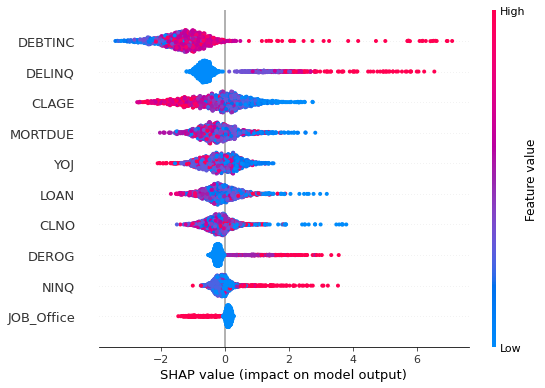

In [1396]:
shap.summary_plot(shap_values, X_test_encode,max_display=10)

In [1399]:
X_test_encode

,LOAN,MORTDUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
1616,11600,66737.0,7.0,0.0,1.0,93.727138,0.0,10.0,37.202954,0,1,0,0,1,0,0,0
4051,21200,69212.0,12.0,0.0,1.0,97.231123,0.0,22.0,18.114896,1,0,0,0,0,1,0,0
2143,13400,111000.0,14.0,0.0,0.0,165.333333,2.0,26.0,34.784870,1,0,0,0,0,1,0,0
503,7000,129959.0,11.0,0.0,0.0,209.986300,0.0,18.0,21.917952,0,1,0,0,0,1,0,0
4475,23300,88825.0,8.0,0.0,0.0,172.551555,1.0,20.0,28.013239,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,12500,41000.0,2.0,0.0,0.0,70.900000,3.0,30.0,34.784870,1,0,0,0,1,0,0,0
5249,28500,84908.0,10.0,0.0,0.0,384.285047,0.0,45.0,41.342011,1,0,0,1,0,0,0,0
3997,20900,69233.0,7.0,2.0,0.0,242.164257,1.0,13.0,40.163651,1,0,0,0,1,0,0,0
1364,10600,48018.0,2.0,0.0,0.0,186.757593,1.0,16.0,30.655744,1,0,1,0,0,0,0,0


In [1432]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_encode.iloc[0])

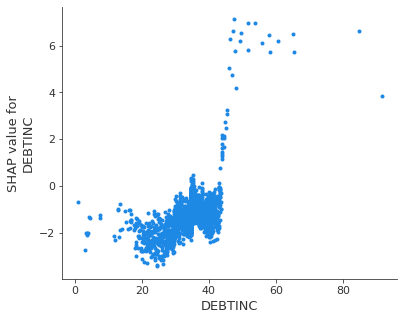

In [1366]:
shap.dependence_plot('DEBTINC', shap_values, X_test_encode,interaction_index=None)

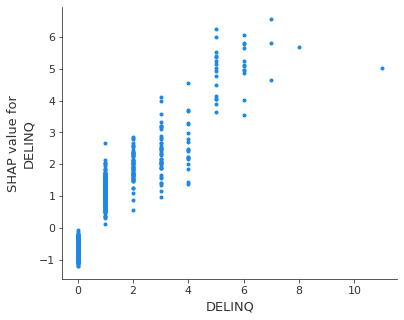

In [1367]:
shap.dependence_plot('DELINQ', shap_values, X_test_encode,interaction_index=None)

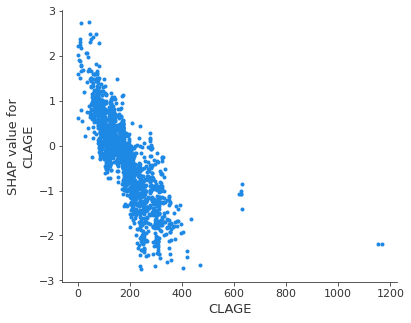

In [1368]:
shap.dependence_plot('CLAGE', shap_values, X_test_encode,interaction_index=None)

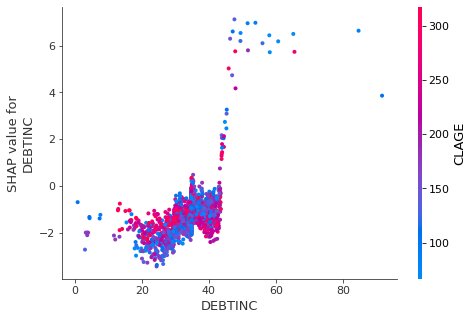

In [1370]:
shap.dependence_plot('DEBTINC', shap_values, X_test_encode)